In [1]:
import pyproj
import pygmt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import ensaio
import verde as vd

In [2]:
fname = ensaio.fetch_alps_gps(version=1)
fname

PosixPath('/home/santi/.cache/ensaio/v1/alps-gps-velocity.csv.xz')

In [3]:
data = pd.read_csv(fname)
data

,station_id,longitude,latitude,height_m,velocity_east_mmyr,velocity_north_mmyr,velocity_up_mmyr,longitude_error_m,latitude_error_m,height_error_m,velocity_east_error_mmyr,velocity_north_error_mmyr,velocity_up_error_mmyr
0,ACOM,13.514900,46.547935,1774.682,0.2,1.2,1.1,0.0005,0.0009,0.001,0.1,0.1,0.1
1,AFAL,12.174517,46.527144,2284.085,-0.7,0.9,1.3,0.0009,0.0009,0.001,0.1,0.2,0.2
2,AGDE,3.466427,43.296383,65.785,-0.2,-0.2,0.1,0.0009,0.0018,0.002,0.1,0.3,0.3
3,AGNE,7.139620,45.467942,2354.600,0.0,-0.2,1.5,0.0009,0.0036,0.004,0.2,0.6,0.5
4,AIGL,3.581261,44.121398,1618.764,0.0,0.1,0.7,0.0009,0.0009,0.002,0.1,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,WLBH,7.351299,48.415171,819.069,0.0,-0.2,-2.8,0.0005,0.0009,0.001,0.1,0.2,0.2
182,WTZR,12.878911,49.144199,666.025,0.1,0.2,-0.1,0.0005,0.0005,0.001,0.1,0.1,0.1
183,ZADA,15.227590,44.113177,64.307,0.2,3.1,-0.3,0.0018,0.0036,0.004,0.2,0.4,0.4
184,ZIMM,7.465278,46.877098,956.341,-0.1,0.4,1.0,0.0005,0.0009,0.001,0.1,0.1,0.1


In [40]:
def plot_geographic_scatter(longitude, latitude, data, title=None, style="c0.2c"):
    """Plot geographic data using mercator projection"""
    fig = pygmt.Figure()
    fig.basemap(
        region=[
            longitude.min(),
            longitude.max(),
            latitude.min(),
            latitude.max(),
        ],
        projection="M15c",
        frame=True,
    )
    fig.coast(land="#666666", water="#b4c8ca")
    pygmt.makecpt(cmap="polar", series=[data.min(), data.max()])
    fig.plot(
        x=longitude, y=latitude, fill=data, cmap=True, style=style
    )
    frame = 'af'
    if title is not None:
        frame += f'+l"{title}"'
    fig.colorbar(frame=frame)
    fig.show()

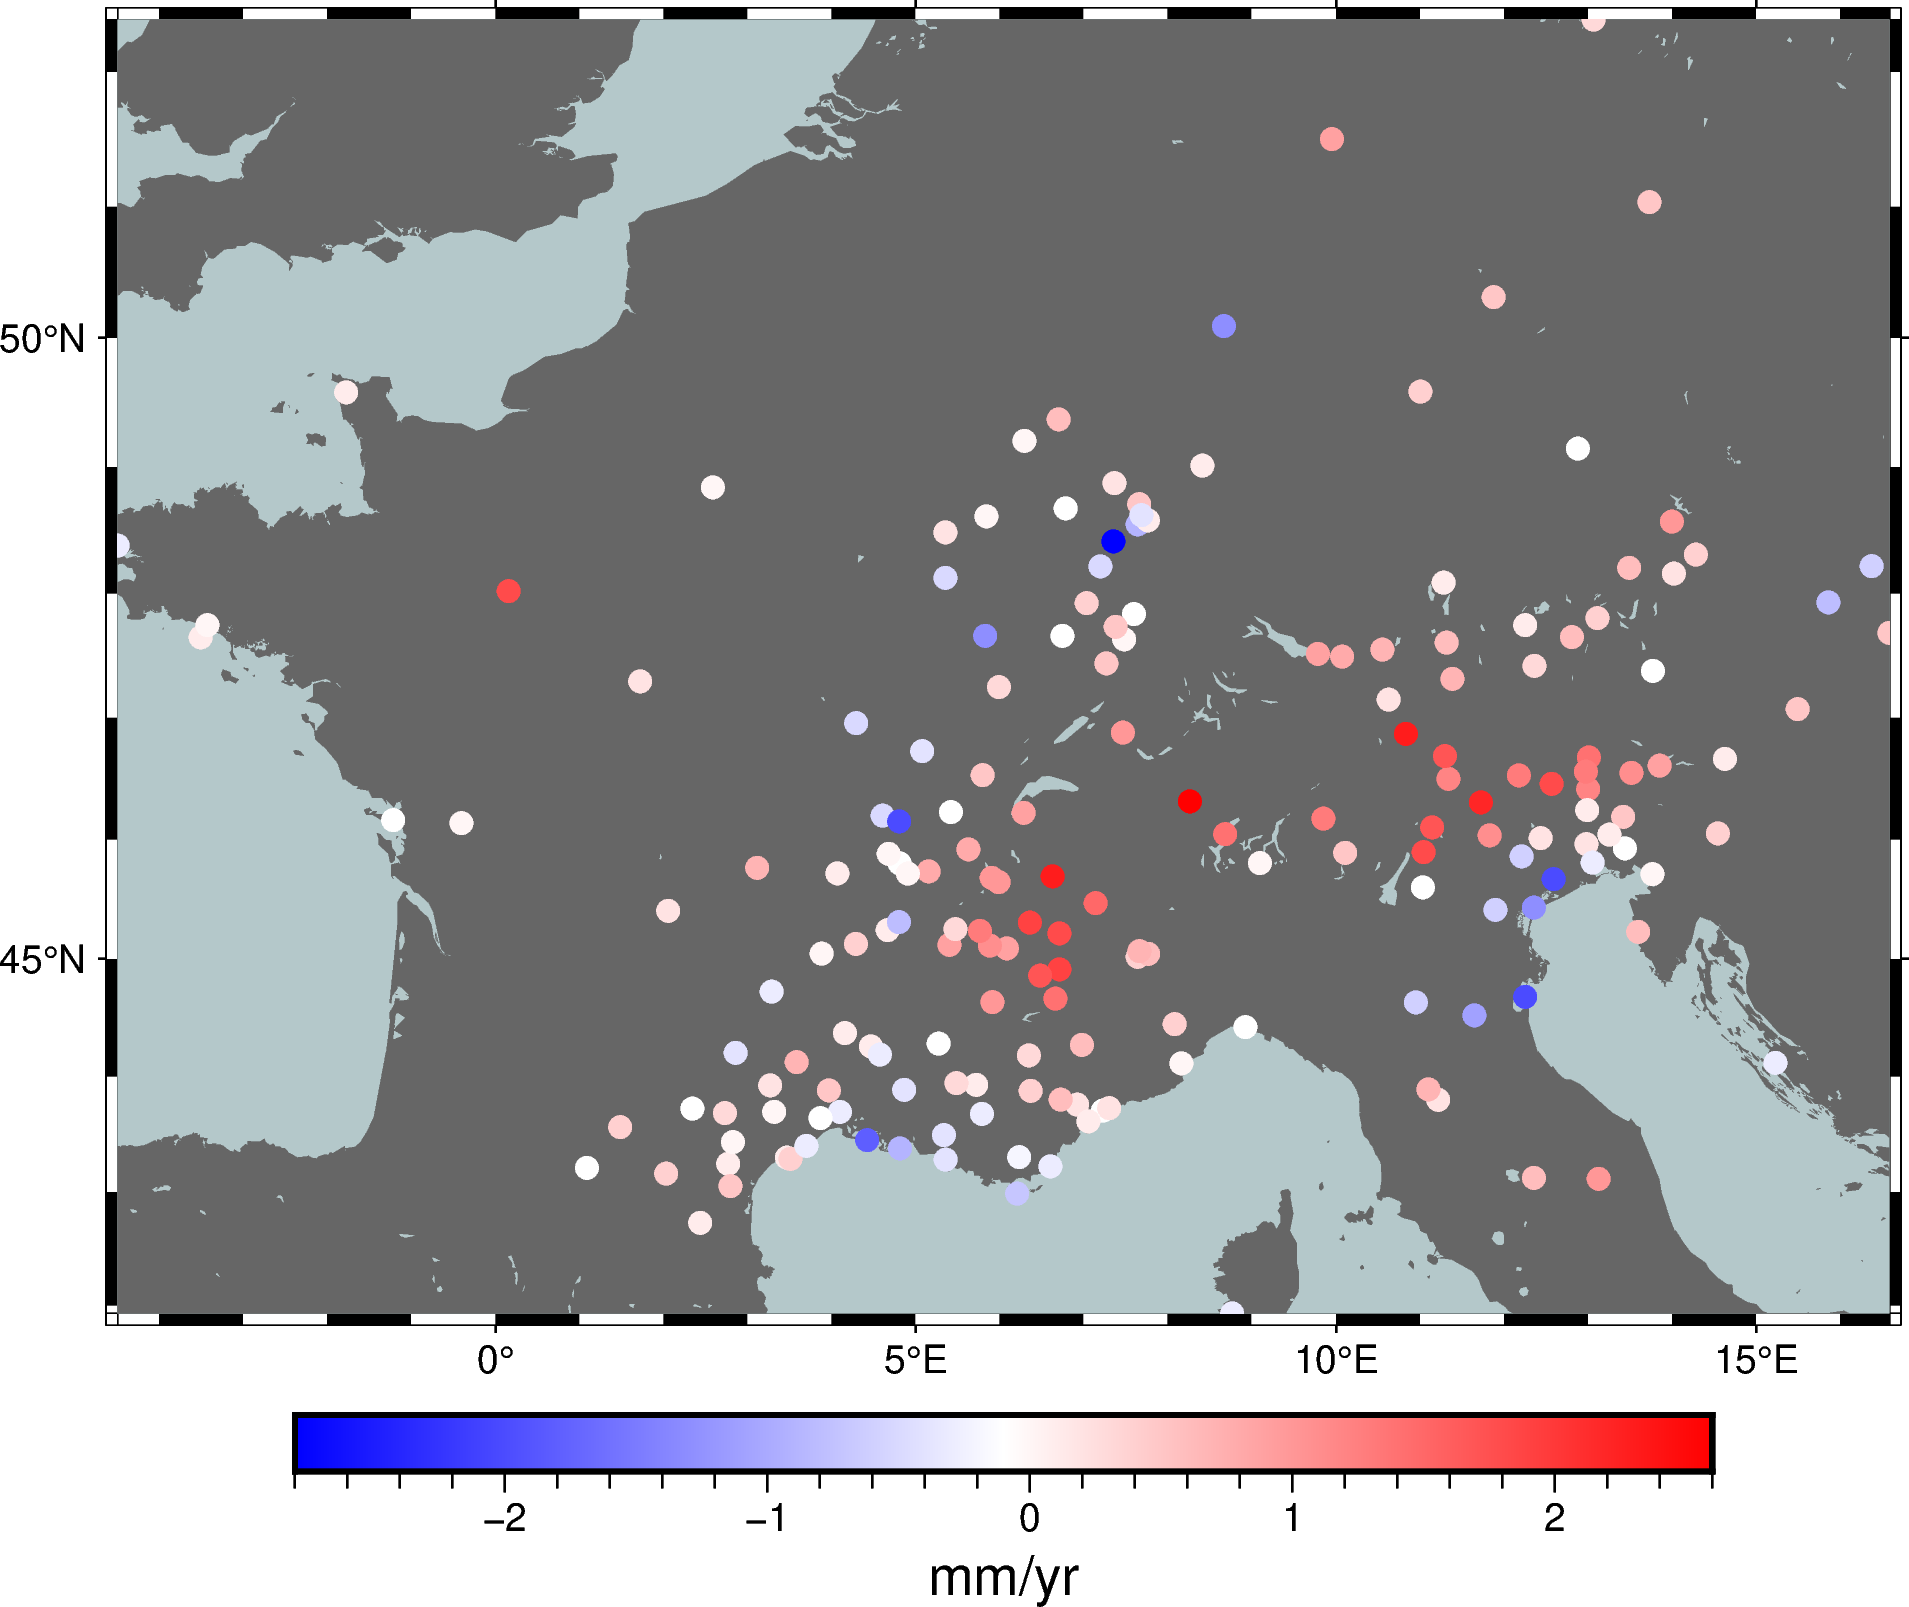

In [41]:
plot_geographic_scatter(data.longitude, data.latitude, data.velocity_up_mmyr, title="mm/yr")

In [29]:
projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
projection

<Other Coordinate Operation Transformer: merc>
Description: PROJ-based coordinate operation
Area of Use:
- undefined

In [30]:
easting, northing = projection(data.longitude.values, data.latitude.values)

In [31]:
data["easting"] = easting
data["northing"] = northing
data

,station_id,longitude,latitude,height_m,velocity_east_mmyr,velocity_north_mmyr,velocity_up_mmyr,longitude_error_m,latitude_error_m,height_error_m,velocity_east_error_mmyr,velocity_north_error_mmyr,velocity_up_error_mmyr,easting,northing
0,ACOM,13.514900,46.547935,1774.682,0.2,1.2,1.1,0.0005,0.0009,0.001,0.1,0.1,0.1,1.047335e+06,4.063806e+06
1,AFAL,12.174517,46.527144,2284.085,-0.7,0.9,1.3,0.0009,0.0009,0.001,0.1,0.2,0.2,9.434620e+05,4.061472e+06
2,AGDE,3.466427,43.296383,65.785,-0.2,-0.2,0.1,0.0009,0.0018,0.002,0.1,0.3,0.3,2.686302e+05,3.708994e+06
3,AGNE,7.139620,45.467942,2354.600,0.0,-0.2,1.5,0.0009,0.0036,0.004,0.2,0.6,0.5,5.532836e+05,3.943692e+06
4,AIGL,3.581261,44.121398,1618.764,0.0,0.1,0.7,0.0009,0.0009,0.002,0.1,0.5,0.5,2.775292e+05,3.797132e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,WLBH,7.351299,48.415171,819.069,0.0,-0.2,-2.8,0.0005,0.0009,0.001,0.1,0.2,0.2,5.696876e+05,4.277291e+06
182,WTZR,12.878911,49.144199,666.025,0.1,0.2,-0.1,0.0005,0.0005,0.001,0.1,0.1,0.1,9.980489e+05,4.362778e+06
183,ZADA,15.227590,44.113177,64.307,0.2,3.1,-0.3,0.0018,0.0036,0.004,0.2,0.4,0.4,1.180059e+06,3.796247e+06
184,ZIMM,7.465278,46.877098,956.341,-0.1,0.4,1.0,0.0005,0.0009,0.001,0.1,0.1,0.1,5.785204e+05,4.100892e+06


In [81]:
spline = vd.Spline(damping=1e-9).fit(
    (data.easting, data.northing),
    data.velocity_up_mmyr,
    weights=data.velocity_up_error_mmyr,
)
spline

Spline(damping=1e-09)

In [82]:
region = vd.get_region((data.longitude, data.latitude))

In [92]:
grid = spline.grid(
    region=region,
    spacing=0.1,
    projection=projection,
    data_names="velocity_up_mmyr",
    dims=("latitude", "longitude"),
)
grid

/home/santi/.mambaforge/envs/2023-fatiando-igeba/lib/python3.9/site-packages/verde/base/base_classes.py:463: FutureWarning: The 'spacing', 'shape' and 'region' arguments will be removed in Verde v2.0.0. Please use the 'verde.grid_coordinates' function to define grid coordinates and pass them as the 'coordinates' argument.
  warnings.warn(


<xarray.Dataset>
Dimensions:           (latitude: 106, longitude: 212)
Coordinates:
  * longitude         (longitude) float64 -4.497 -4.397 -4.297 ... 16.48 16.58
  * latitude          (latitude) float64 41.93 42.03 42.13 ... 52.18 52.28 52.38
Data variables:
    velocity_up_mmyr  (latitude, longitude) float64 -2.06 -2.04 ... -0.1186
Attributes:
    metadata:  Generated by Spline(damping=1e-09)

In [93]:
grid_masked = vd.distance_mask(data_coordinates=(data.longitude, data.latitude), maxdist=1.2, grid=grid)
grid_masked

<xarray.Dataset>
Dimensions:           (latitude: 106, longitude: 212)
Coordinates:
  * longitude         (longitude) float64 -4.497 -4.397 -4.297 ... 16.48 16.58
  * latitude          (latitude) float64 41.93 42.03 42.13 ... 52.18 52.28 52.38
Data variables:
    velocity_up_mmyr  (latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    metadata:  Generated by Spline(damping=1e-09)

In [94]:
grid_masked = vd.convexhull_mask(data_coordinates=(data.longitude, data.latitude), grid=grid)
grid_masked

<xarray.Dataset>
Dimensions:           (latitude: 106, longitude: 212)
Coordinates:
  * longitude         (longitude) float64 -4.497 -4.397 -4.297 ... 16.48 16.58
  * latitude          (latitude) float64 41.93 42.03 42.13 ... 52.18 52.28 52.38
Data variables:
    velocity_up_mmyr  (latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    metadata:  Generated by Spline(damping=1e-09)

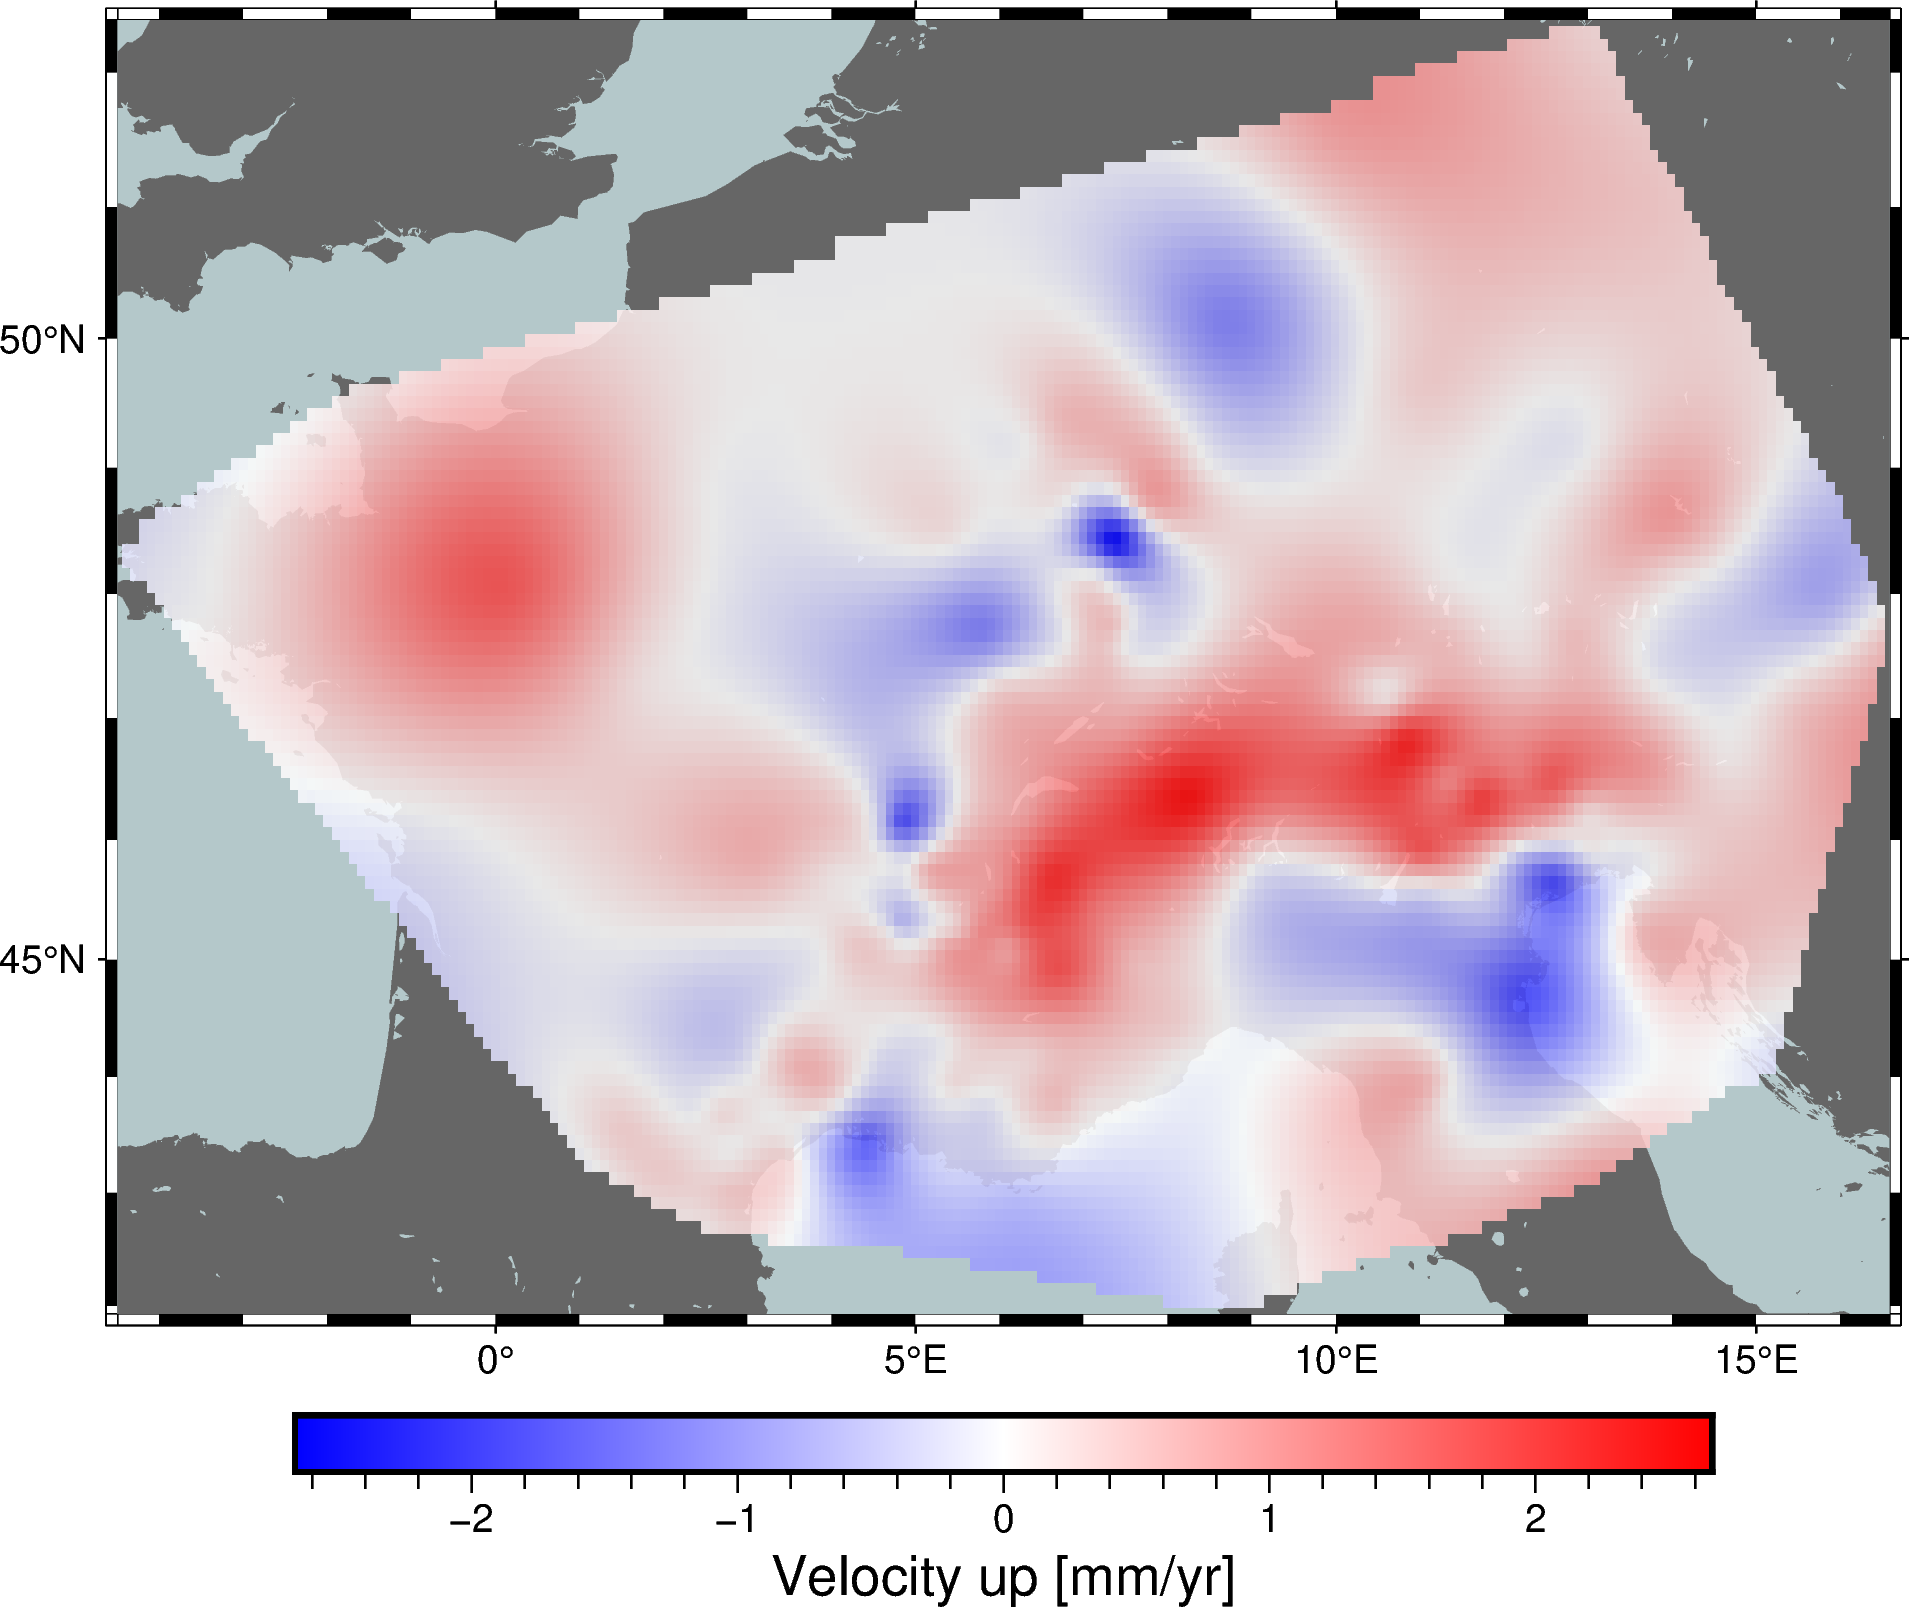

In [101]:
fig = pygmt.Figure()
gmt_projection = "M15c"

fig.basemap(
    region=[
        grid_masked.longitude.values.min(),
        grid_masked.longitude.values.max(),
        grid_masked.latitude.values.min(),
        grid_masked.latitude.values.max(),
    ],
    projection=gmt_projection,
    frame=True,
)
fig.coast(land="#666666", water="#b4c8ca")

maxabs = vd.maxabs(grid_masked.velocity_up_mmyr)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs], no_bg=True)
#shade = pygmt.grdgradient(grid=grid_masked.velocity_up_mmyr, azimuth=45, normalize=1)
fig.grdimage(
    grid=grid_masked.velocity_up_mmyr,
    cmap=True,
    #shading=shade,
    projection=gmt_projection,
    nan_transparent=True,
    transparency=15,
)


frame = 'af+l"Velocity up [mm/yr]"'
fig.colorbar(frame=frame)
fig.show()